In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
ordinal = pd.read_csv('ordinal.csv')
drop = pd.read_csv('drop.csv')
full = pd.read_csv('full.csv')

In [3]:
ordinal_X = ordinal.drop(columns=['SalePrice'])
ordinal_y = ordinal['SalePrice']
drop_X = drop.drop(columns=['SalePrice'])
drop_y = drop['SalePrice']
full_X = full.drop(columns=['SalePrice'])
full_y = full['SalePrice']

### Split the data into Training and Testing Datasets

In [4]:
ordinal_train_X,ordinal_test_x,ordinal_train_y,ordinal_test_y = train_test_split(ordinal_X,ordinal_y,test_size=0.1,random_state=21)
drop_train_X,drop_test_x, drop_train_y,drop_test_y = train_test_split(drop_X,drop_y,test_size=0.1,random_state=21)
full_train_X,full_test_x,full_train_y,full_test_y = train_test_split(full_X,full_y,test_size=0.1,random_state=21)

### Test if the datasets are divided in the same way

In [5]:
(drop_test_y.mean() == full_test_y.mean())

True

### See if the samples for the Training and the Test set have similar propoerties and are aproptiate to use

Mean Sale Price for Training set:  180429.93531202435
STD for Sale Price for Training set:  78279.75091005577


Text(0.5, 1.0, 'Distribution of Prices for Training Set')

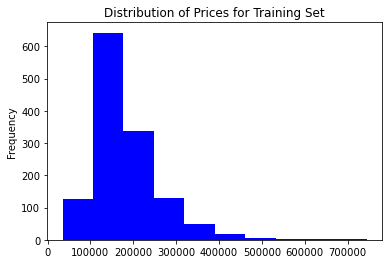

In [6]:
ordinal_train_y.plot(kind='hist',color='blue');
print('Mean Sale Price for Training set: ', ordinal_train_y.mean())
print('STD for Sale Price for Training set: ', ordinal_train_y.std())
plt.title('Distribution of Prices for Training Set');


Mean Sale Price for Test set:  185342.54109589042
STD for Sale Price for Test set:  89405.87774684896


Text(0.5, 1.0, 'Distribution of Prices for Test Set')

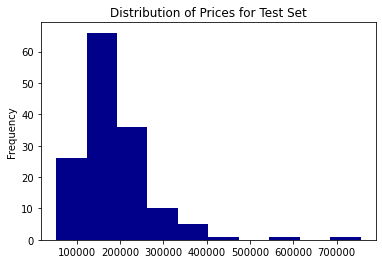

In [7]:
ordinal_test_y.plot(kind='hist',color='darkblue');
print('Mean Sale Price for Test set: ', ordinal_test_y.mean())
print('STD for Sale Price for Test set: ', ordinal_test_y.std())
plt.title('Distribution of Prices for Test Set');


In [8]:
from scipy.stats import ks_2samp
from scipy import stats
print(ks_2samp(ordinal_test_y,ordinal_train_y))
stats.ttest_ind(ordinal_test_y,ordinal_train_y)

KstestResult(statistic=0.060882800608828, pvalue=0.6963386570310459)


Ttest_indResult(statistic=0.7087328990517826, pvalue=0.4786035454077411)

### Dummy Regressor with Mean and Median

In [9]:
dumreg = DummyRegressor(strategy='mean')
dumreg_median = DummyRegressor(strategy='median')
dumreg.fit(ordinal_train_X,ordinal_train_y)
dumreg_median.fit(ordinal_train_X,ordinal_train_y)
pred_dummy = dumreg.predict(ordinal_train_X)
pred_dummy_median = dumreg_median.predict(ordinal_train_X)
print('Mean for Training Sample: ',round(ordinal_train_y.mean(),2))
print('STD for Training Sample: ',round(ordinal_train_y.std(),2))
print('Squared Error with Mean Predictor is: ', round(mean_squared_error(pred_dummy,ordinal_train_y),2))
print('Absolute Error with Mean Predictor is: ', round(mean_absolute_error(pred_dummy,ordinal_train_y),2))
print('Squared Error with Median Predictor is: ', round(mean_squared_error(pred_dummy_median,ordinal_train_y),2))
print('Absolute Error with Median Predictor is: ', round(mean_absolute_error(pred_dummy_median,ordinal_train_y),2))

Mean for Training Sample:  180429.94
STD for Training Sample:  78279.75
Squared Error with Mean Predictor is:  6123055993.56
Absolute Error with Mean Predictor is:  57055.5
Squared Error with Median Predictor is:  6428604132.07
Absolute Error with Median Predictor is:  55285.91


### We will test SGD on the Ordinal and Full Dataset 

#### SGD withouth parameter tuning

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
linreg = SGDRegressor()
scores_ordinal = cross_val_score(linreg, ordinal_train_X,ordinal_train_y,scoring='neg_mean_squared_error',cv=10)
scores_drop = cross_val_score(linreg, drop_train_X,drop_train_y,scoring='neg_mean_squared_error',cv=10)
scores_full = cross_val_score(linreg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)

In [11]:
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_ordinal.mean()),2))
print('Average Prediction Mistake for Drop Dataset: ', round(np.sqrt(-scores_drop.mean()),2))
print('Average Prediction Mistake for Full Dataset: ', round(np.sqrt(-scores_full.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  35275.94
Average Prediction Mistake for Drop Dataset:  34539.34
Average Prediction Mistake for Full Dataset:  35108.36


In [100]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ('l1','l2'), 'alpha': np.linspace(0.01,5,10)}
sgd = SGDRegressor(loss='squared_loss')
gridsearch = GridSearchCV(sgd,parameters,cv=10,scoring='neg_mean_squared_error')
gridsearch.fit(drop_train_X,drop_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

34435.865084007695 {'alpha': 0.01, 'penalty': 'l1'}
34051.71320925704 {'alpha': 0.01, 'penalty': 'l2'}
34449.54041864513 {'alpha': 5.564444444444445, 'penalty': 'l1'}
47354.09354867418 {'alpha': 5.564444444444445, 'penalty': 'l2'}
34346.69026047618 {'alpha': 11.11888888888889, 'penalty': 'l1'}
53541.02743705322 {'alpha': 11.11888888888889, 'penalty': 'l2'}
34796.49048842467 {'alpha': 16.673333333333336, 'penalty': 'l1'}
60969.13037591901 {'alpha': 16.673333333333336, 'penalty': 'l2'}
34477.23713647306 {'alpha': 22.22777777777778, 'penalty': 'l1'}
61618.53754260258 {'alpha': 22.22777777777778, 'penalty': 'l2'}
35518.43731360886 {'alpha': 27.782222222222227, 'penalty': 'l1'}
65857.07787808785 {'alpha': 27.782222222222227, 'penalty': 'l2'}
33958.647351401996 {'alpha': 33.336666666666666, 'penalty': 'l1'}
67195.2895683994 {'alpha': 33.336666666666666, 'penalty': 'l2'}
34201.2868527147 {'alpha': 38.891111111111115, 'penalty': 'l1'}
68723.6997116538 {'alpha': 38.891111111111115, 'penalty': '

##### After several tests "Drop" dataset seems to be working best and L1 regularization with minimal value for alpha gives us the best results

In [62]:
sgd = SGDRegressor(penalty='l1', alpha=0.05,loss='squared_loss')
scores_optimal = cross_val_score(sgd, drop_train_X,drop_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  34109.0


In [40]:
model = sgd.fit(drop_train_X,drop_train_y)
sgd_coef_df = pd.DataFrame(data=model.coef_,index=drop.columns[:-1],columns=['Model Coefs'])

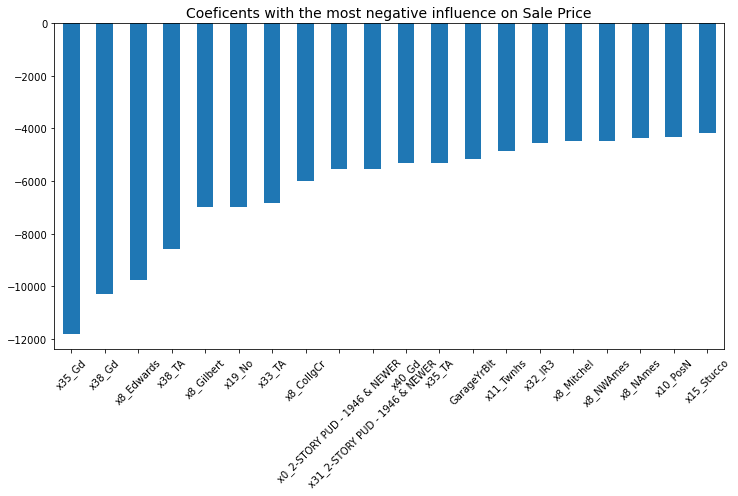

In [56]:
plt.figure(figsize=(12,6))
plt.title('Coeficents with the most negative influence on Sale Price',fontsize=14)
sgd_coef_df['Model Coefs'].sort_values()[0:20].plot(kind='bar');
plt.xticks(rotation=45);

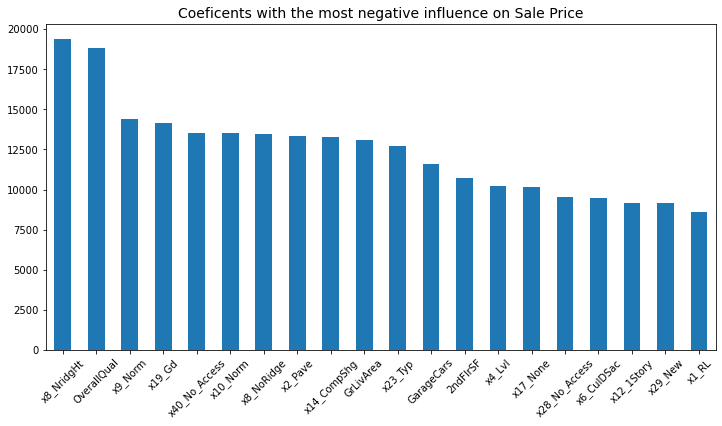

In [55]:
plt.figure(figsize=(12,6))
plt.title('Coeficents with the most negative influence on Sale Price',fontsize=14)
sgd_coef_df['Model Coefs'].sort_values(ascending=False)[0:20].plot(kind='bar');
plt.xticks(rotation=45);

### The optimzed CV SGD result is around 34000 RMSE

## Support Vector Regressor

In [67]:
from sklearn.svm import SVR
svr = SVR()
scores_optimal = cross_val_score(svr, ordinal_train_X,ordinal_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  80303.15


In [68]:
#parameters = {'kernel': ('linear','poly','rbf','sigmoid'), 'C': [50,100,200]}
#gridsearch = GridSearchCV(svr,parameters,cv=10,scoring='neg_mean_squared_error')
#gridsearch.fit(full_train_X,full_train_y)

#cvres = gridsearch.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

35841.678237633976 {'C': 50, 'kernel': 'linear'}
77673.40803228777 {'C': 50, 'kernel': 'poly'}
78139.91899715693 {'C': 50, 'kernel': 'rbf'}
76481.45528551236 {'C': 50, 'kernel': 'sigmoid'}
33737.665433199974 {'C': 100, 'kernel': 'linear'}
75325.31081928621 {'C': 100, 'kernel': 'poly'}
75975.98133014805 {'C': 100, 'kernel': 'rbf'}
72865.18902444017 {'C': 100, 'kernel': 'sigmoid'}
32542.856103974143 {'C': 200, 'kernel': 'linear'}
70762.79312841156 {'C': 200, 'kernel': 'poly'}
72054.7721674714 {'C': 200, 'kernel': 'rbf'}
66210.9283288169 {'C': 200, 'kernel': 'sigmoid'}


In [74]:
svr = SVR(kernel='rbf')
parameters = {'C': np.linspace(100000,150000,5)}
gridsearch = GridSearchCV(svr,parameters,cv=10,scoring='neg_mean_squared_error')
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

30209.113779807813 {'C': 100000.0}
30092.935081724918 {'C': 112500.0}
30008.92400062759 {'C': 125000.0}
29957.919654070785 {'C': 137500.0}
29927.41760202328 {'C': 150000.0}


In [95]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1500)
scores_optimal = cross_val_score(svr, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  31523.33


In [79]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', C=150000)
scores_optimal = cross_val_score(svr, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  33175.83


In [80]:
svr = SVR(kernel='linear', C=1500)
model = svr.fit(full_train_X,full_train_y)

In [91]:
svr_coef_df = pd.DataFrame(data=model.coef_.T,index=full.columns[:-1],columns=['Model Coefs'])

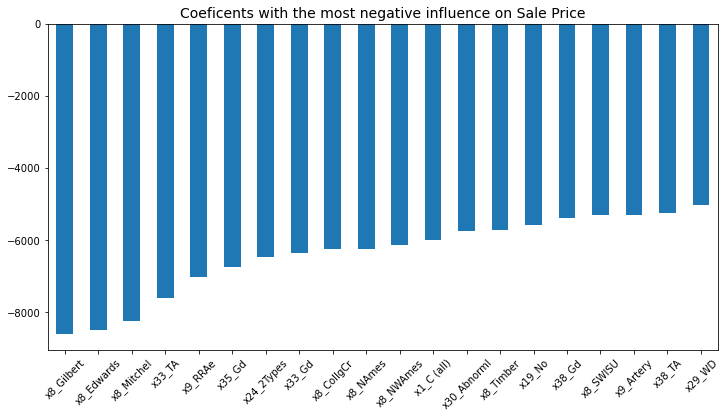

In [92]:
plt.figure(figsize=(12,6))
plt.title('Coeficents with the most negative influence on Sale Price',fontsize=14)
svr_coef_df['Model Coefs'].sort_values()[0:20].plot(kind='bar');
plt.xticks(rotation=45);

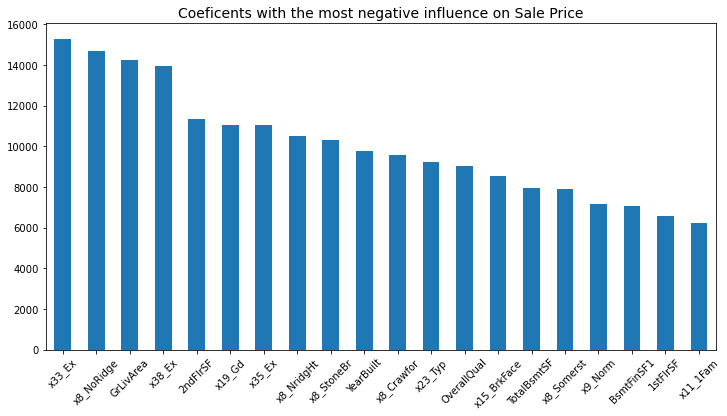

In [93]:
plt.figure(figsize=(12,6))
plt.title('Coeficents with the most negative influence on Sale Price',fontsize=14)
svr_coef_df['Model Coefs'].sort_values(ascending=False)[0:20].plot(kind='bar');
plt.xticks(rotation=45);

### The optimzed CV SVR result is around 31500 RMSE

## Decision Trees


In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
scores_optimal = cross_val_score(tree_reg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  39071.51


In [19]:
#from sklearn.tree import DecisionTreeRegressor
#tree_reg = DecisionTreeRegressor()
#parameters = {'max_depth': np.linspace(10,100,10),'min_samples_split': [20,40,60,100],'min_samples_leaf': [6,12,18,14],'max_features': ('auto','sqrt','log2')}
#gridsearch = GridSearchCV(tree_reg,parameters,cv=10,scoring='neg_mean_squared_error')
#gridsearch.fit(full_train_X,full_train_y)

#cvres = gridsearch.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

In [20]:
#from sklearn.tree import DecisionTreeRegressor
#tree_reg = DecisionTreeRegressor(max_depth=80)
#parameters = {'min_samples_split': [4,12,16,20],'min_samples_leaf': [18,24,36]}
#gridsearch = GridSearchCV(tree_reg,parameters,cv=10,scoring='neg_mean_squared_error')
#gridsearch.fit(full_train_X,full_train_y)

#cvres = gridsearch.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

In [96]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=80,min_samples_leaf=24)
scores_optimal = cross_val_score(tree_reg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  36734.23


In [97]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
scores_optimal = cross_val_score(forest_reg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  30757.38


In [23]:
#parameters = {'min_samples_split': [2,6,12],'min_samples_leaf': [6,12,18],'n_estimators': [50,100,200]}
#gridsearch = GridSearchCV(forest_reg,parameters,cv=10,scoring='neg_mean_squared_error')
#gridsearch.fit(full_train_X,full_train_y)

#cvres = gridsearch.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

In [99]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(min_samples_leaf=6,min_samples_split=2)
scores_optimal = cross_val_score(forest_reg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  31176.99


### GradientBoostingRegressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor 
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=300, learning_rate=0.1)
scores_optimal = cross_val_score(gbrt, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  26585.18


In [118]:
gbrt = GradientBoostingRegressor(min_samples_split=8,min_samples_leaf=3,max_depth=5,max_features='sqrt',subsample=0.8)
parameters = {'n_estimators': range(20,81,10)}
gridsearch = GridSearchCV(gbrt,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

35318.960041073915 {'n_estimators': 20}
32202.522371700084 {'n_estimators': 30}
30343.027844961667 {'n_estimators': 40}
29229.563690350362 {'n_estimators': 50}
28359.002204510194 {'n_estimators': 60}
27562.279855045985 {'n_estimators': 70}
28568.63372251897 {'n_estimators': 80}


In [120]:
gbrt = GradientBoostingRegressor(n_estimators=70,learning_rate=0.1,max_features='sqrt',subsample=0.8)
parameters = {'max_depth':range(2,16,2), 'min_samples_split':range(3,30,3)}
gridsearch = GridSearchCV(gbrt,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32707.135901621645 {'max_depth': 2, 'min_samples_split': 3}
32898.45004447304 {'max_depth': 2, 'min_samples_split': 6}
32278.73350529271 {'max_depth': 2, 'min_samples_split': 9}
32774.44860687508 {'max_depth': 2, 'min_samples_split': 12}
31491.020738102463 {'max_depth': 2, 'min_samples_split': 15}
31643.159843992842 {'max_depth': 2, 'min_samples_split': 18}
32386.732938165558 {'max_depth': 2, 'min_samples_split': 21}
31627.56897378494 {'max_depth': 2, 'min_samples_split': 24}
31149.07876783992 {'max_depth': 2, 'min_samples_split': 27}
29069.110547693843 {'max_depth': 4, 'min_samples_split': 3}
29268.951020465567 {'max_depth': 4, 'min_samples_split': 6}
28924.413680777798 {'max_depth': 4, 'min_samples_split': 9}
29287.78597668663 {'max_depth': 4, 'min_samples_split': 12}
28985.00851051281 {'max_depth': 4, 'min_samples_split': 15}
30459.161642505358 {'max_depth': 4, 'min_samples_split': 18}
28747.87072696284 {'max_depth': 4, 'min_samples_split': 21}
29937.666720196885 {'max_depth': 4, 'm

In [121]:
gbrt = GradientBoostingRegressor(n_estimators=60,learning_rate=0.1,subsample=0.8,max_depth=6,min_samples_split=21)
parameters = {'max_features': range(40,80,4)}
gridsearch = GridSearchCV(gbrt,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

27907.341716616473 {'max_features': 40}
28941.154864234497 {'max_features': 44}
26700.745998982027 {'max_features': 48}
27652.722726931876 {'max_features': 52}
26110.92846145478 {'max_features': 56}
27929.31040580414 {'max_features': 60}
28099.244367912364 {'max_features': 64}
27749.920247175458 {'max_features': 68}
28067.0546641583 {'max_features': 72}
29428.354297234382 {'max_features': 76}


In [124]:
gbrt = GradientBoostingRegressor(n_estimators=60,learning_rate=0.1,max_depth=6,min_samples_split=21,max_features=48)
parameters = {'subsample': np.linspace(0.4,0.8,10)}
gridsearch = GridSearchCV(gbrt,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

29227.653922649 {'subsample': 0.4}
29413.847232478674 {'subsample': 0.4444444444444445}
29573.176817859214 {'subsample': 0.48888888888888893}
29233.61456132699 {'subsample': 0.5333333333333333}
29518.50102154102 {'subsample': 0.5777777777777778}
28753.732093314815 {'subsample': 0.6222222222222222}
27078.177967852458 {'subsample': 0.6666666666666667}
28499.02933839281 {'subsample': 0.7111111111111111}
28706.716655583405 {'subsample': 0.7555555555555555}
26704.562108893053 {'subsample': 0.8}


In [131]:
from sklearn.ensemble import GradientBoostingRegressor 
gbrt = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.03,max_depth=6,min_samples_split=21,max_features=48,subsample=0.8)
scores_optimal = cross_val_score(gbrt, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  26220.08


In [134]:
model = gbrt.fit(full_train_X,full_train_y)
gbrt_coef_df = pd.DataFrame(data=model.feature_importances_,index=full.columns[:-1],columns=['Model Coefs'])

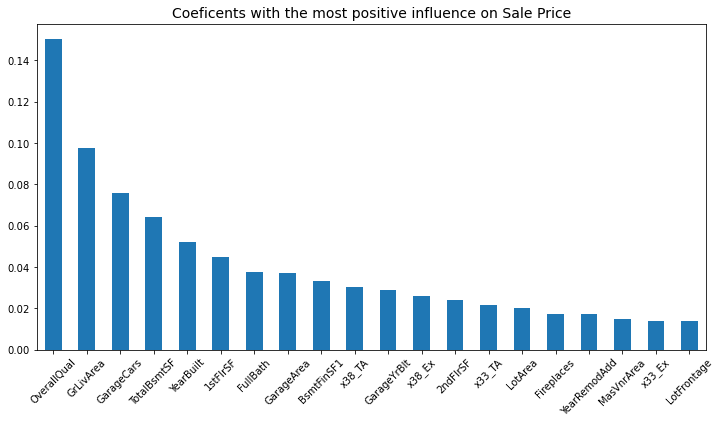

In [139]:
plt.figure(figsize=(12,6))
plt.title('Coeficents with the most positive influence on Sale Price',fontsize=14)
gbrt_coef_df['Model Coefs'].sort_values(ascending=False)[0:20].plot(kind='bar');
plt.xticks(rotation=45);

### WIth Gradient Booster the RMSE seems to be around 26000

In [141]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 1000,learning_rate=0.1,subsample=0.8,max_depth=8)

parameters = {}
gridsearch = GridSearchCV(xgb_reg,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



29080.08582923672 {}


In [142]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 100,learning_rate=0.1,subsample=0.8)

parameters = {'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)}
gridsearch = GridSearchCV(xgb_reg,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



29329.203067133014 {'max_depth': 3, 'min_child_weight': 1}
28897.9431518293 {'max_depth': 3, 'min_child_weight': 3}
28695.85204367018 {'max_depth': 3, 'min_child_weight': 5}
29418.881383043932 {'max_depth': 5, 'min_child_weight': 1}
27792.922817282244 {'max_depth': 5, 'min_child_weight': 3}
28982.663355465076 {'max_depth': 5, 'min_child_weight': 5}
28830.56790709677 {'max_depth': 7, 'min_child_weight': 1}
28617.605160030736 {'max_depth': 7, 'min_child_weight': 3}
28554.56184399331 {'max_depth': 7, 'min_child_weight': 5}
29421.059676285528 {'max_depth': 9, 'min_child_weight': 1}
28939.63410531813 {'max_depth': 9, 'min_child_weight': 3}
28629.621617097073 {'max_depth': 9, 'min_child_weight': 5}


In [145]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 100,learning_rate=0.1,subsample=0.8,max_depth=5,min_child_weight=3)

parameters = {'gamma': range(1,5,1)}
gridsearch = GridSearchCV(xgb_reg,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



27792.922817282244 {'gamma': 1}
27792.922817282244 {'gamma': 2}
27792.922817282244 {'gamma': 3}
27792.922817282244 {'gamma': 4}


In [147]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 1000,learning_rate=0.1,subsample=0.8,max_depth=5,min_child_weight=3)
scores_optimal = cross_val_score(xgb_reg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  27344.8


In [148]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 200,learning_rate=0.1,max_depth=5,min_child_weight=3)

parameters = { 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]}
gridsearch = GridSearchCV(xgb_reg,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



27455.670274368225 {'colsample_bytree': 0.6, 'subsample': 0.6}
27245.60578077305 {'colsample_bytree': 0.6, 'subsample': 0.7}
28428.634678124545 {'colsample_bytree': 0.6, 'subsample': 0.8}
27920.5079870773 {'colsample_bytree': 0.6, 'subsample': 0.9}
27274.75556477438 {'colsample_bytree': 0.7, 'subsample': 0.6}
27046.02717516732 {'colsample_bytree': 0.7, 'subsample': 0.7}
27591.226951211527 {'colsample_bytree': 0.7, 'subsample': 0.8}
28102.220580739788 {'colsample_bytree': 0.7, 'subsample': 0.9}
28389.509237035232 {'colsample_bytree': 0.8, 'subsample': 0.6}
27548.19295645912 {'colsample_bytree': 0.8, 'subsample': 0.7}
27418.060710077658 {'colsample_bytree': 0.8, 'subsample': 0.8}
27418.11349242319 {'colsample_bytree': 0.8, 'subsample': 0.9}
27596.071562084115 {'colsample_bytree': 0.9, 'subsample': 0.6}
27982.01282228359 {'colsample_bytree': 0.9, 'subsample': 0.7}
28206.7996557221 {'colsample_bytree': 0.9, 'subsample': 0.8}
28690.3643541058 {'colsample_bytree': 0.9, 'subsample': 0.9}


In [151]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 200,learning_rate=0.1,max_depth=5,min_child_weight=3,subsample=0.7,colsample_bytree=0.7)

parameters = {'reg_alpha':[5000,7500,10000,20000]}
gridsearch = GridSearchCV(xgb_reg,parameters,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(full_train_X,full_train_y)

cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



26431.532806043964 {'reg_alpha': 5000}
26941.650973553955 {'reg_alpha': 7500}
26782.715662974904 {'reg_alpha': 10000}
27284.919174416595 {'reg_alpha': 20000}


In [155]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 8000,learning_rate=0.02,max_depth=5,min_child_weight=3,subsample=0.7,colsample_bytree=0.7,reg_alpha=5000)
scores_optimal = cross_val_score(xgb_reg, full_train_X,full_train_y,scoring='neg_mean_squared_error',cv=10)
print('Average Prediction Mistake for Ordinal Dataset: ', round(np.sqrt(-scores_optimal.mean()),2))

Average Prediction Mistake for Ordinal Dataset:  27260.59


In [160]:
data_dmatrix = xgb.DMatrix(data=full_train_X,label=full_train_y)
params = {'objective':'reg:squarederror',
          'seed': 123,
          'learning_rate':0.02,
          'max_depth':5,
          'min_child_weight':3,
          'subsample':0.7,
          'colsample_bytree':0.7,
          'reg_alpha':5000
         }

In [161]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, num_boost_round=8000,nfold=10,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
1409,3247.804858,161.617077,26234.637109,6660.003246
1410,3244.138501,161.461703,26234.560156,6660.010679
1411,3240.313062,161.352499,26234.571289,6660.227727
1412,3237.016162,160.943634,26234.428711,6659.363971
1413,3232.837598,160.692094,26233.276953,6659.987509


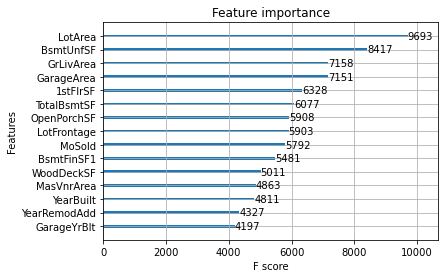

In [162]:
from xgboost import plot_importance,plot_tree
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',seed = 123,n_estimators = 8000,learning_rate=0.02,max_depth=5,min_child_weight=3,subsample=0.7,colsample_bytree=0.7,reg_alpha=5000)
xgb_reg.fit(full_train_X,full_train_y)
plot_importance(xgb_reg,max_num_features=15);

### Results on test set with Gradient Booster and XGBooster

In [163]:
pred = xgb_reg.predict(full_test_x)

In [164]:
np.sqrt(mean_squared_error(pred,full_test_y))

28421.168722882812

In [165]:
gbrt = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.03,max_depth=6,min_samples_split=21,max_features=48,subsample=0.8)
gbrt.fit(full_train_X,full_train_y)
pred = gbrt.predict(full_test_x)
np.sqrt(mean_squared_error(pred,full_test_y))

32063.36775816719

### Xgboost although with higher bias results in a model with much lower Variance than the Gradient Booster